In [8]:
from modules.loader import load_video_as_ndarray
from modules.utils import print_video_frames
import pathlib

#sample = pathlib.Path("./data/001697.mp4")
sample = pathlib.Path("./data/unsorted/14/segments/000023.mp4")

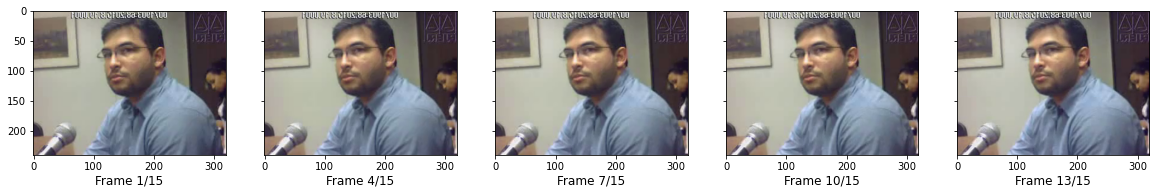

In [9]:
## RGB Mode
video_rgb = load_video_as_ndarray(sample, 'rgb')
print_video_frames(video_rgb, 3)

In [ ]:
# Grayscale Mode
video_gray = load_video_as_ndarray(sample, 'gray')
print_video_frames(video_gray, 3)

In [ ]:
# Landmarks
video_lm = load_video_as_ndarray(sample, 'landmarks')

print_video_frames(video_lm, 3)

In [ ]:
import cv2 as cv2
import pandas as pd
from math import floor

base = cv2.imread('export/Tom_Cruise_avp_2014_4.jpg')
points = pd.read_csv('export/dump.txt', header=None)

for index, row in enumerate(points.itertuples()):
    img = base.copy()
    for pt in range(1, len(points.columns), 2):
        x = row[pt]
        y = row[pt+1]
        print((x, y))
        img = cv2.circle(img, (floor(x/2), floor(y/2)), 4, (0, 0, 255), 5)
        cv2.imwrite('figures/faciallm_iter{}.jpg'.format(index), img)